## Price Prediction and Linear Regression ##

 ### Importing packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

This imports the main Statsmodels API, giving access to a wide range of statistical models and tools.

Common uses:

Fitting linear regression models (e.g., sm.OLS)

Adding a constant to predictors (e.g., sm.add_constant)

In [2]:
import statsmodels.api as sm

VIF is used to calculate Variance Inflation Factor (VIF), which detects multicollinearity among independent variables in a regression model.

Purpose:
VIF > 10 (common threshold) suggests high multicollinearity.

Helps in diagnosing problems in regression caused by correlated predictors.

Annova performs Analysis of Variance (ANOVA) on fitted linear models.

Purpose:
Compares multiple models or checks if your independent variables significantly explain the variability in the outcome.

Useful for model comparison and hypothesis testing.

In [3]:
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [4]:
!pip install ISLP

In [5]:
 from ISLP import load_data
 from ISLP.models import (ModelSpec as MS,
                           summarize, poly)

##**Simple Linear Regression**

In [6]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

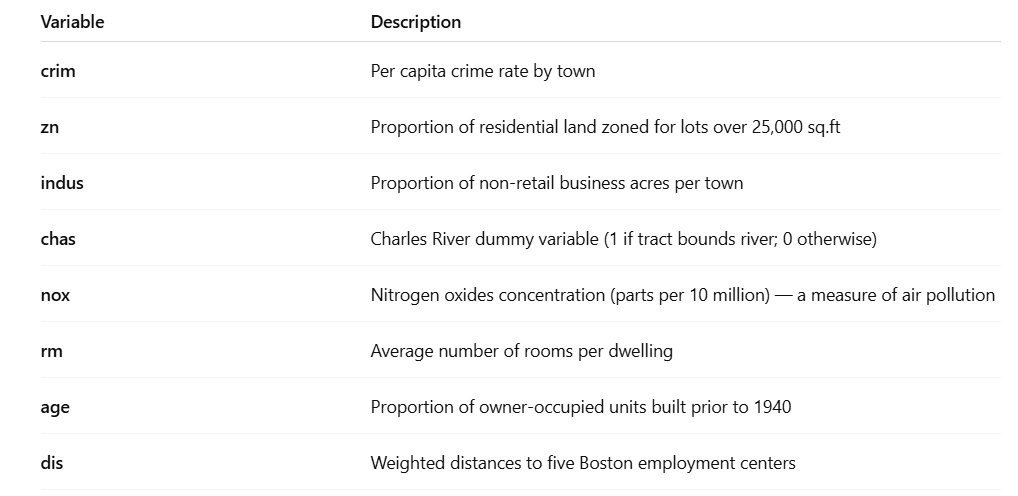

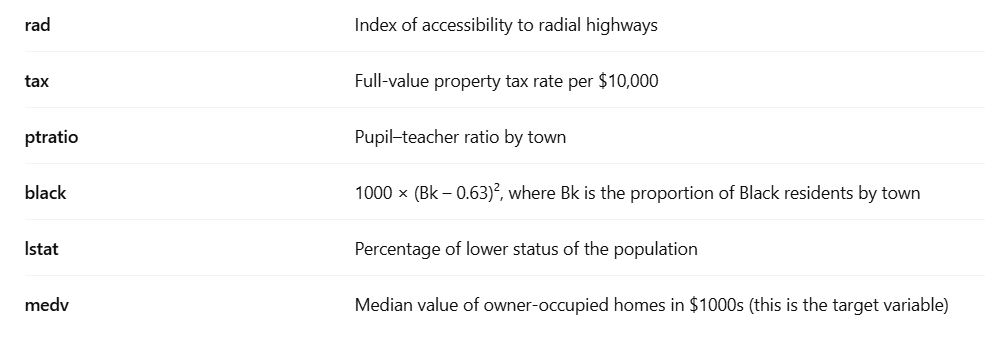

### Model matrix


A model matrix (also called a design matrix) is a numerical matrix that represents the predictor variables (independent variables) used in a regression model.

It usually contains:

A column of 1s for the intercept term

One or more columns for each predictor variable

Our response will be medv and lstat will be the single predictor.
For this model,create the model matrix by hand.

In [7]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


Column of 1s	Used to multiply with
𝛽
0
​
 , the intercept term

The sklearn package has a particular notion sklearn  for this type of task
The object has two main methods:  fit() and transform().
constructing  the model matrix through the transform ModelSpec() in the ISLP library.


In [37]:
 design = MS(['lstat'])
 design = design.fit(Boston)
 X = design.transform(Boston)
 X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


These two operations can be combined with the ***fit_transform()*** method.

In [39]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


extract the response,and fit the model

In [38]:
 y = Boston['medv']
 model = sm.OLS(y, X)
 results = model.fit()

ISLP function summarize() produces a simple table of the parameter estimates, the standard errors,t-statistics and p-values.

In [40]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


The object results has several
 methods that can be used for inference

 For a full and some what
 exhaustive summary of the fit, use the summary() method

In [12]:
 results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 30 Jul 2025   Prob (F-statistic):           5.08e-88
Time:                        09:58:36   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The fitted coefficients can also be retrieved as the params attribute of
 results.

In [13]:
results.params


intercept    34.553841
lstat        -0.950049
dtype: float64

### ***Prediction***

The get_prediction() method can be used to obtain predictions, and .get_
 prediction() produce confidence intervals and prediction intervals for the prediction of
 medv for given values of lstat.


 We first create a new dataframe, in this case containing only the variable lstat, with the values for this variable at which we wish to make
 predictions.

 We then use the transform() method of design to create the   
  corresponding model matrix

In [14]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [15]:
 new_predictions = results.get_prediction(newX);
 new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [16]:
 new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [17]:
 new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

 For instance, the 95% confidence interval associated with an lstat value of
 10 is (24.47,25.63),and the 95% prediction interval is(12.82,37.28).
 As expected, the confidence and prediction intervals are centered around the
 same point(a predicted value of 25.05 formed vwhen lstat equals 10), but
 the latter are substantially wider.




### Defining Functions




In [18]:
def abline(ax, b, m):
 "Add a line with slope m and intercept b to ax"
 xlim = ax.get_xlim()
 ylim = [m * xlim[0] + b, m * xlim[1] + b]
 ax.plot(xlim, ylim)

In [19]:
def abline(ax, b, m, *args, **kwargs):
 "Add a line with slope m and intercept b to ax"
 xlim = ax.get_xlim()
 ylim = [m * xlim[0] + b, m * xlim[1] + b]
 ax.plot(xlim, ylim, *args, **kwargs)

  *args,  **kwargs	Optional style arguments (color, linestyle, etc.)

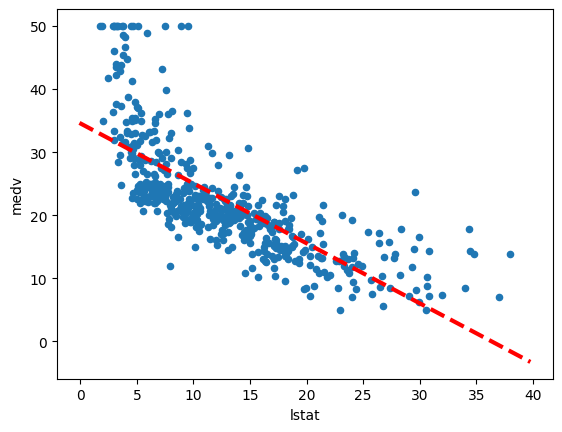

In [20]:
 ax = Boston.plot.scatter('lstat', 'medv')
 abline(ax,
        results.params.iloc[0] ,
        results.params.iloc[1],
        'r--',
        linewidth=3)

###**Diagnostic plots**

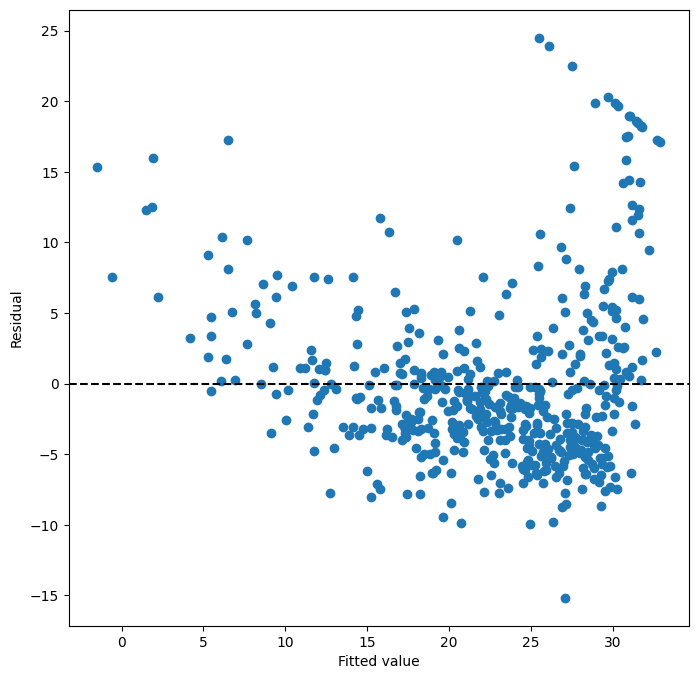

In [21]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

Detect non-linearity

Spot unequal error variance (heteroscedasticity)

np.int64(374)

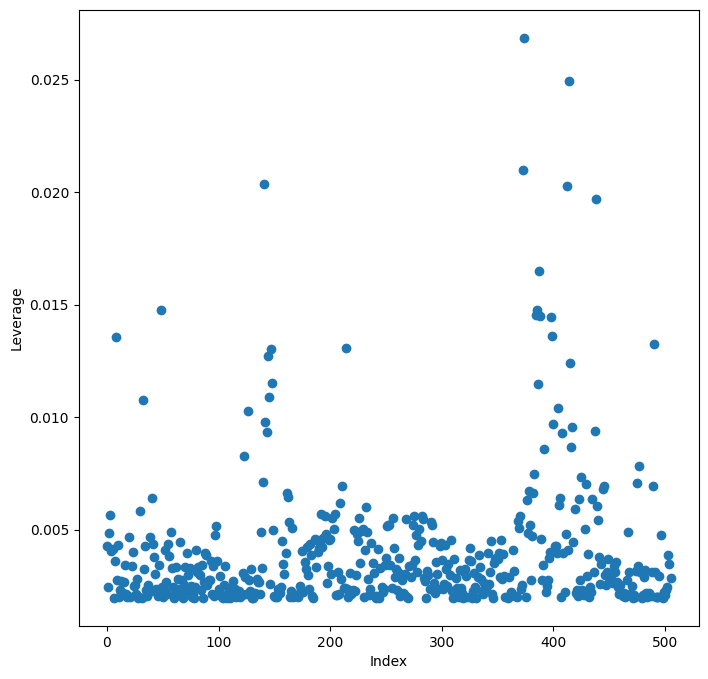

In [23]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

#**Multiple Linear Regression**


### Model matrix and fit a model with lstat and Age


In [24]:
 X = MS(['lstat', 'age']).fit_transform(Boston)
 model1 = sm.OLS(y, X)
 results1 = model1.fit()
 summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [25]:
 terms = Boston.columns.drop('medv')
 terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [26]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [27]:
 minus_age = Boston.columns.drop(['medv', 'age'])
 Xma = MS(minus_age).fit_transform(Boston)
 model1 = sm.OLS(y, Xma)
 summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


#**Multivariate Goodness of Fit**

In [28]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pval

**VIF--variance_
 inflation_
 factor()**

In [41]:
 vals = []
 for i in range(1, X.values.shape[1]):
  vals.append(VIF(X.values, i))
vals

[np.float64(1.0000000000000004)]

In [30]:
vals = [VIF(X, i)
  for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


### **Interaction Terms**

It is easy to include interaction terms in a linear model using ModelSpec().
Including a tuple ("lstat","age") tells the model matrix builder to include
an interaction term between lstat and age

In [31]:
 X = MS(['lstat',
  'age',
  ('lstat', 'age')]).fit_transform(Boston)
 model2 = sm.OLS(y, X)
 summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


### Non-linear Transformations of the Predictors

In [32]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


### anova_lm()function

In [33]:
 anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


 ### Q**ualitative Predictors**

In [34]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [35]:
final= list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']

X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())


,coef,std err,t,P>|t|
intercept,5.6606,0.603,9.380,0.000
CompPrice,0.0928,0.004,22.378,0.000
Income,0.0158,0.002,8.565,0.000
Advertising,0.1231,0.011,11.066,0.000
Population,0.0002,0.000,0.561,0.575
Price,-0.0954,0.003,-35.700,0.000
ShelveLoc[Good],4.8502,0.153,31.678,0.000
ShelveLoc[Medium],1.9567,0.126,15.516,0.000
Age,-0.0460,0.003,-14.472,0.000
Education,-0.0211,0.020,-1.070,0.285


In [36]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'), ('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())


,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


## Q2 ##